# Spam email detection

In [1]:
#importing required libaries
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt

In [2]:
#import the dataset
data=pd.read_csv("spam_data.csv")

In [3]:
data

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [4]:
data.describe()

,Category,Message
count,5572,5572
unique,2,5157
top,ham,"Sorry, I'll call later"
freq,4825,30


total spam and ham in the dataset


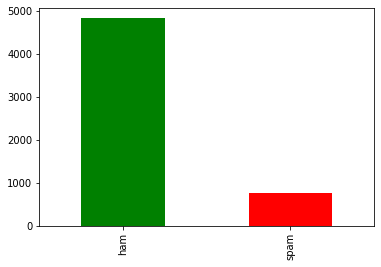

In [5]:
data['Category'].value_counts().plot.bar(color=['g','r'])
print("total spam and ham in the dataset")
plt.show()


## Preprocessing the data

In [6]:
data.isnull()

,Category,Message
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
5567,False,False
5568,False,False
5569,False,False
5570,False,False


In [7]:
data.shape

(5572, 2)

In [8]:
data.isna().sum()

Category    0
Message     0
dtype: int64

In [9]:
# text preprocessing- remove the puncuation and convert the letters to lowercase and removes the words that do not contribute much for building the model which are stopwords
import string
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

def text_preprocessing(text):
    text=text.translate(str.maketrans('','',string.punctuation))
    text=[i.lower() for i in text.split() if i.lower() not in stopwords.words('english')]
    return " ".join(text)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\perik\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [10]:
msg_copy=data.Message.copy()
msg_copy=msg_copy.apply(text_preprocessing)
msg_copy

0       go jurong point crazy available bugis n great ...
1                                 ok lar joking wif u oni
2       free entry 2 wkly comp win fa cup final tkts 2...
3                     u dun say early hor u c already say
4             nah dont think goes usf lives around though
                              ...                        
5567    2nd time tried 2 contact u u £750 pound prize ...
5568                          ü b going esplanade fr home
5569                          pity mood soany suggestions
5570    guy bitching acted like id interested buying s...
5571                                       rofl true name
Name: Message, Length: 5572, dtype: object

In [11]:
vectorizer=CountVectorizer()
# now to convert the text to matrix we use fit_transform method
msg_matrix=vectorizer.fit_transform(msg_copy)
print(msg_matrix.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


## Spliting the data

In [12]:
x_train,x_test,y_train,y_test=train_test_split(msg_matrix,data['Category'],random_state=2,test_size=0.3)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(3900, 9433)
(3900,)
(1672, 9433)
(1672,)


## Fitting the model using logistic regression

In [13]:
from sklearn.linear_model import LogisticRegression

logistic_reg=LogisticRegression(solver='liblinear',penalty='l1')
logistic_reg.fit(x_train,y_train)
lrprediction=logistic_reg.predict(x_test)

## Fitting the model using Naive bayes classifier

In [14]:
from sklearn.naive_bayes import MultinomialNB

nbclassifier=MultinomialNB()
nbclassifier.fit(x_train,y_train)
nbprediction=nbclassifier.predict(x_test)


## Comparison of the performance of both the classifiers

Performance of logistic regression:

classification report:
               precision    recall  f1-score   support

         ham       0.97      0.99      0.98      1445
        spam       0.95      0.81      0.87       227

    accuracy                           0.97      1672
   macro avg       0.96      0.90      0.93      1672
weighted avg       0.97      0.97      0.97      1672


confuion matrix:
 [[1436    9]
 [  44  183]]

Accuracy score: 0.9683014354066986


Heatmap on prediction:



<AxesSubplot:>

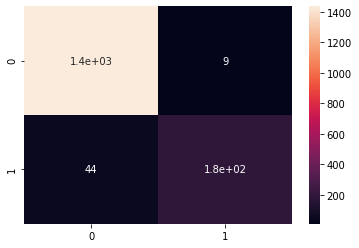

In [15]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
import seaborn as sns

# performance of logisctic regression
print("Performance of logistic regression:")
print()
print('classification report:\n',classification_report(y_test,lrprediction))
print()
print("confuion matrix:\n",confusion_matrix(y_test,lrprediction))
print()
print("Accuracy score:",accuracy_score(y_test,lrprediction))
print("\n\nHeatmap on prediction:\n")
sns.heatmap(confusion_matrix(y_test,lrprediction),annot=True)

Performance of Naive bayes:

classification report:
               precision    recall  f1-score   support

         ham       0.99      0.98      0.98      1445
        spam       0.89      0.91      0.90       227

    accuracy                           0.97      1672
   macro avg       0.94      0.95      0.94      1672
weighted avg       0.97      0.97      0.97      1672


confuion matrix:
 [[1420   25]
 [  20  207]]

Accuracy score: 0.9730861244019139


Heatmap on prediction:



<AxesSubplot:>

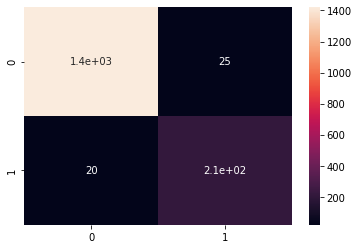

In [16]:
# performance of Naive bayes 
print("Performance of Naive bayes:")
print()
print('classification report:\n',classification_report(y_test,nbprediction))
print()
print("confuion matrix:\n",confusion_matrix(y_test,nbprediction))
print()
print("Accuracy score:",accuracy_score(y_test,nbprediction))
print("\n\nHeatmap on prediction:\n")
sns.heatmap(confusion_matrix(y_test,nbprediction),annot=True)